In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.regression.linear_model import OLS

In [3]:
def load_data(data_path):
    data = pd.read_csv(data_path)
    data["DATE"] = pd.to_datetime(data[["YEAR", "MONTH", "DAY"]])
    data.set_index("DATE", inplace=True)
    data.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)
    return data

In [4]:
TRAINING_DATA_PATH = "data/PSX/raw/train/data.csv"
VALIDATING_DATA_PATH = "data/PSX/raw/validate/data.csv"

In [5]:
training_data = load_data(TRAINING_DATA_PATH)
training_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 992 entries, 2020-01-01 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   OPEN    992 non-null    float64
 1   HIGH    992 non-null    float64
 2   LOW     992 non-null    float64
 3   CLOSE   992 non-null    float64
 4   VOLUME  992 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 46.5 KB


In [6]:
training_data.head()

,OPEN,HIGH,LOW,CLOSE,VOLUME
DATE,,,,,
2020-01-01,125.00,127.50,122.90,125.43,95800
2020-01-02,123.15,127.49,123.15,125.84,111600
2020-01-03,125.00,125.00,122.00,122.98,66600
2020-01-06,120.25,125.00,117.10,119.28,108600
2020-01-07,122.00,123.50,113.32,119.26,416300


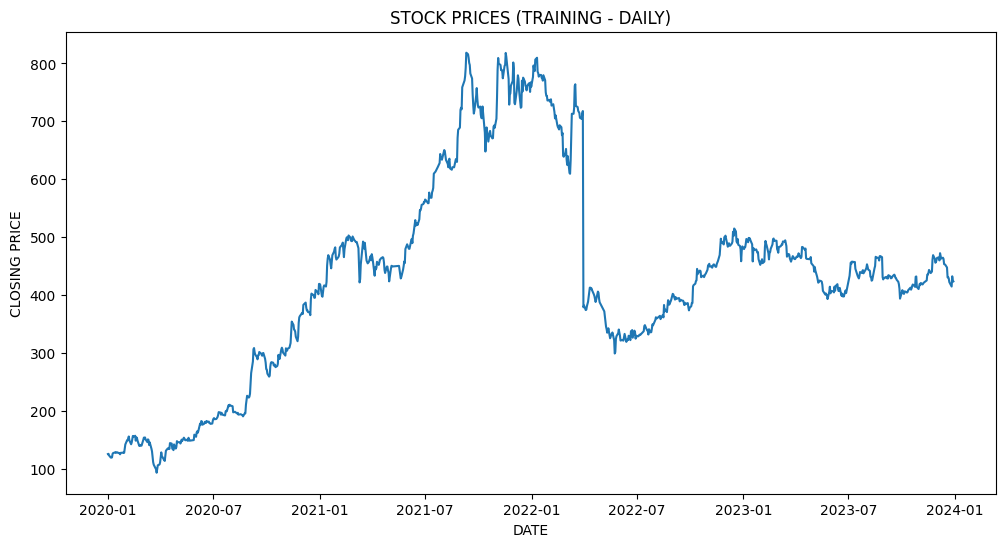

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(training_data["CLOSE"])
plt.title("STOCK PRICES (TRAINING - DAILY)")
plt.xlabel("DATE")
plt.ylabel("CLOSING PRICE")
plt.show()

In [8]:
weekly_training_data = training_data.resample("W").mean().dropna()
weekly_training_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 208 entries, 2020-01-05 to 2023-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   OPEN    208 non-null    float64
 1   HIGH    208 non-null    float64
 2   LOW     208 non-null    float64
 3   CLOSE   208 non-null    float64
 4   VOLUME  208 non-null    float64
dtypes: float64(5)
memory usage: 9.8 KB


In [9]:
weekly_training_data.head()

,OPEN,HIGH,LOW,CLOSE,VOLUME
DATE,,,,,
2020-01-05,124.383333,126.663333,122.683333,124.750,91333.333333
2020-01-12,123.044000,125.224000,119.984000,122.194,337720.000000
2020-01-19,127.790000,130.278000,126.922000,128.192,305300.000000
2020-01-26,127.290000,128.970000,125.618000,126.818,55540.000000
2020-02-02,131.700000,133.444000,130.050000,132.094,350700.000000


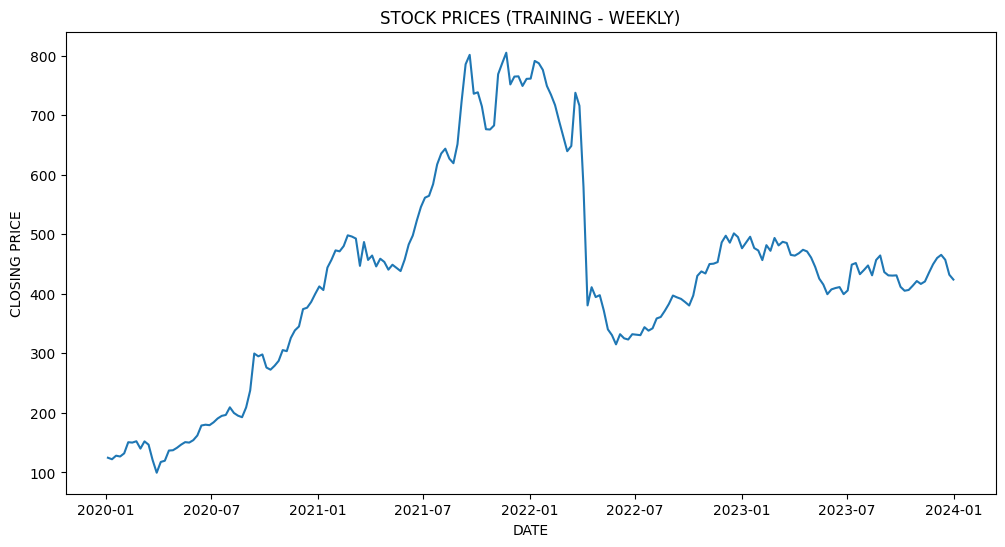

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_training_data["CLOSE"])
plt.title("STOCK PRICES (TRAINING - WEEKLY)")
plt.xlabel("DATE")
plt.ylabel("CLOSING PRICE")
plt.show()

In [11]:
validating_data = load_data(VALIDATING_DATA_PATH)
validating_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2024-01-01 to 2024-06-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   OPEN    119 non-null    float64
 1   HIGH    119 non-null    float64
 2   LOW     119 non-null    float64
 3   CLOSE   119 non-null    float64
 4   VOLUME  119 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.6 KB


In [12]:
validating_data.head()

,OPEN,HIGH,LOW,CLOSE,VOLUME
DATE,,,,,
2024-01-01,426.0,449.5,424.89,447.75,483450
2024-01-02,445.0,449.9,437.00,441.08,197802
2024-01-03,441.0,442.2,436.50,437.13,233563
2024-01-04,437.0,438.0,430.00,431.79,152811
2024-01-05,431.0,434.0,420.00,430.54,150448


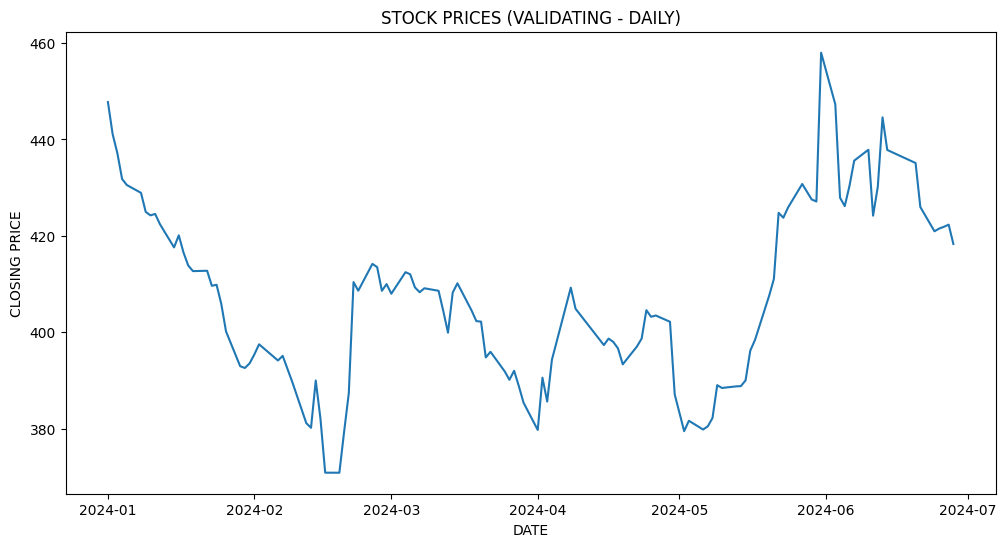

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(validating_data["CLOSE"])
plt.title("STOCK PRICES (VALIDATING - DAILY)")
plt.xlabel("DATE")
plt.ylabel("CLOSING PRICE")
plt.show()

In [14]:
weekly_validating_data = validating_data.resample("W").mean().dropna()
weekly_validating_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26 entries, 2024-01-07 to 2024-06-30
Freq: W-SUN
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   OPEN    26 non-null     float64
 1   HIGH    26 non-null     float64
 2   LOW     26 non-null     float64
 3   CLOSE   26 non-null     float64
 4   VOLUME  26 non-null     float64
dtypes: float64(5)
memory usage: 1.2 KB


In [15]:
weekly_validating_data.head()

,OPEN,HIGH,LOW,CLOSE,VOLUME
DATE,,,,,
2024-01-07,436.000,442.720,429.678,437.658,243614.8
2024-01-14,428.160,430.204,422.632,425.018,149306.4
2024-01-21,419.278,421.828,413.640,416.154,106668.0
2024-01-28,410.598,414.058,406.026,407.656,421489.8
2024-02-04,397.106,400.072,393.088,394.396,410014.8


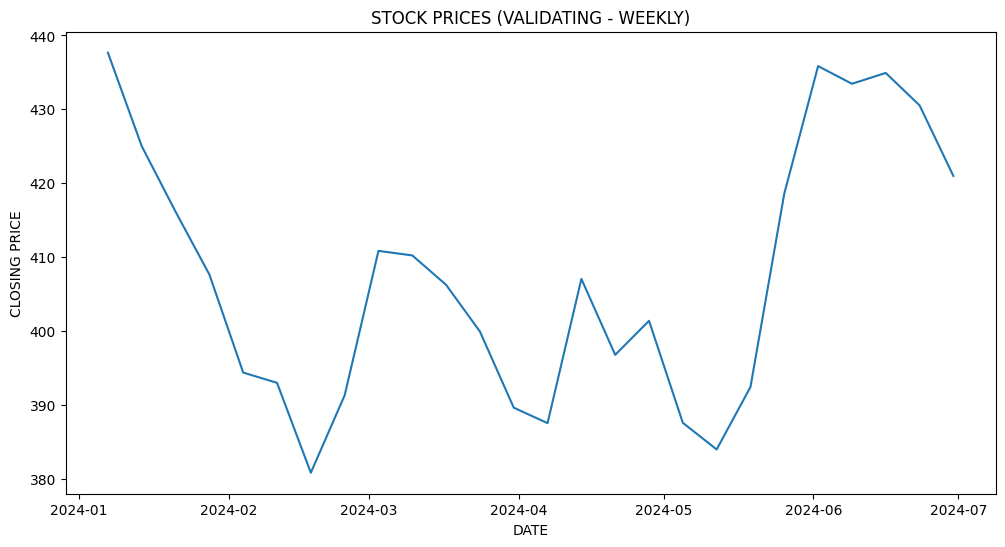

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_validating_data["CLOSE"])
plt.title("STOCK PRICES (VALIDATING - WEEKLY)")
plt.xlabel("DATE")
plt.ylabel("CLOSING PRICE")
plt.show()

In [17]:
result = adfuller(training_data["CLOSE"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -1.9323378818361436
p-value: 0.3170045605518597


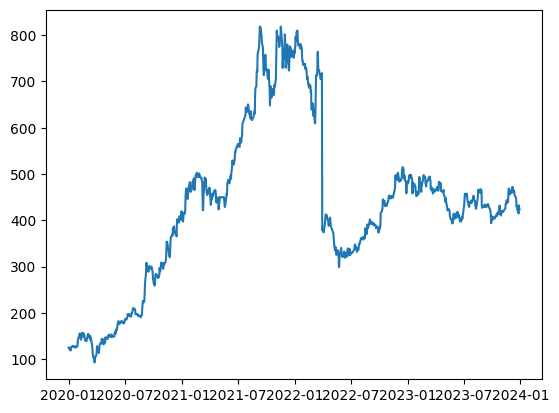

In [18]:
THRESH = 0.01

X = training_data["CLOSE"].copy()
plt.plot(X)
while True:
    _, p_value, *_ = adfuller(X)
    if p_value > THRESH:
        X = np.log(X).diff().dropna()
    else:
        break

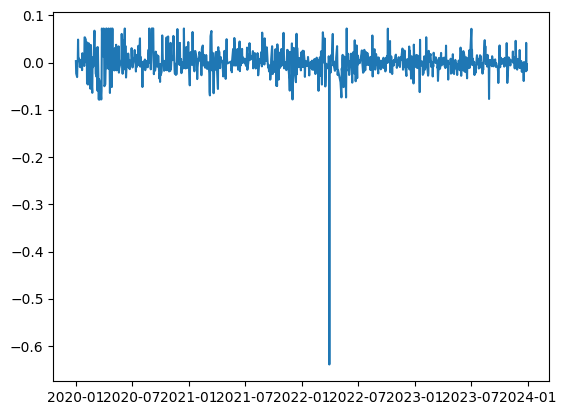

In [19]:
plt.plot(X)

In [20]:
class ARIMA:
    def __init__(self, data, p, d, q):
        self.data = data
        self.p = p
        self.d = d
        self.q = q

    def fit(self):
        diff_data = self.data
        for _ in range(self.d):
            diff_data = diff_data.diff().dropna()

        plot_acf(self.data, lags=31)
        plot_pacf(self.data, lags=31)

        X = np.column_stack([diff_data.shift(i) for i in range(1, self.p + 1)])
        X = X[self.p :]
        y = diff_data[self.p :]
        self.model_ar = OLS(y, X).fit()

        self.residuals = y - self.model_ar.predict(X)
        self.residuals = self.residuals[self.q :]

        X_residuals = np.column_stack(
            [self.residuals.shift(i) for i in range(1, self.q + 1)]
        )
        X_residuals = X_residuals[self.q :]
        y_residuals = self.residuals[self.q :]

        self.model_ma = OLS(y_residuals, X_residuals).fit()

    def predict(self, steps):
        predictions = []
        last_data = self.data[-self.p :]
        for _ in range(steps):
            ar_part = np.dot(self.model_ar.params, last_data[-self.p :])
            ma_part = np.dot(self.model_ma.params, self.residuals[-self.q :])
            prediction = ar_part + ma_part
            predictions.append(prediction)

            last_data = np.append(last_data, prediction)
            self.residuals = np.append(self.residuals, prediction - ar_part)

        return predictions

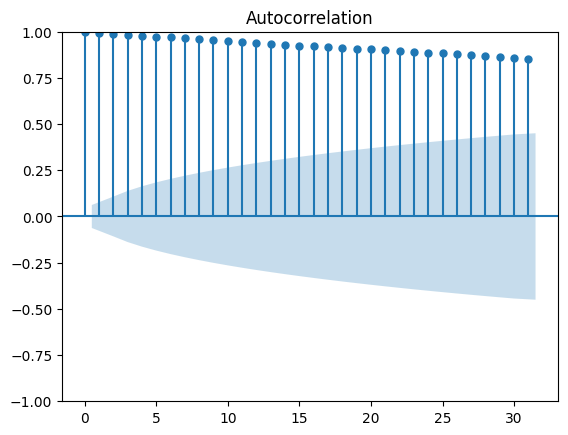

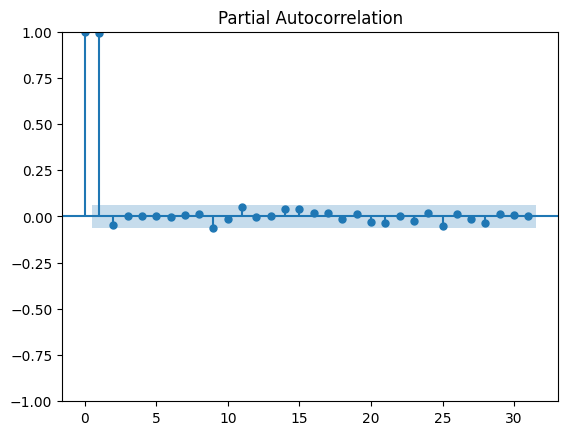

In [21]:
arima = ARIMA(training_data["CLOSE"], p=1, d=0, q=253)
arima.fit()

In [22]:
steps = 182
pred_dates = pd.date_range(
    start=validating_data.index[0],
    periods=steps,
    # freq="W-SUN",
)
pred_dates

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10',
               ...
               '2024-06-21', '2024-06-22', '2024-06-23', '2024-06-24',
               '2024-06-25', '2024-06-26', '2024-06-27', '2024-06-28',
               '2024-06-29', '2024-06-30'],
              dtype='datetime64[ns]', length=182, freq='D')

In [23]:
predictions = arima.predict(steps=steps)
[float(p) for p in predictions]

[419.7952690310814,
 418.1559372810584,
 412.00584477299714,
 403.30661609357134,
 401.68541287747036,
 393.8463751351162,
 392.8806391691848,
 391.26269348622657,
 390.51561020495507,
 390.3471232071969,
 388.699317420791,
 396.6598559462737,
 405.24113157090125,
 404.64461123946256,
 403.9818738456971,
 395.05119621870955,
 391.0705141111624,
 389.54586367060494,
 386.870178235796,
 379.79706501397266,
 384.0026686045572,
 387.05792603354803,
 390.921342395309,
 395.10226323081974,
 397.1102420482135,
 400.51588280402405,
 406.66980096544836,
 400.57279143068473,
 387.96913995521146,
 389.2623637511086,
 387.8200746791584,
 395.74831415152875,
 397.53481407890575,
 396.2954810267488,
 397.67453336615847,
 399.81580728514984,
 404.55121024298313,
 409.11045427715095,
 410.7953709295779,
 412.5496062643326,
 411.06789772934866,
 407.0065744514836,
 407.8702162215985,
 405.7343674632967,
 409.8663641115822,
 415.68310361808267,
 422.5886794184533,
 422.9925588282194,
 428.15098527860573

In [24]:
predictions = pd.Series(predictions, index=pred_dates)
predictions

2024-01-01    419.795269
2024-01-02    418.155937
2024-01-03    412.005845
2024-01-04    403.306616
2024-01-05    401.685413
                 ...    
2024-06-26    420.715178
2024-06-27    412.407623
2024-06-28    412.370292
2024-06-29    404.408144
2024-06-30    403.945545
Freq: D, Length: 182, dtype: float64

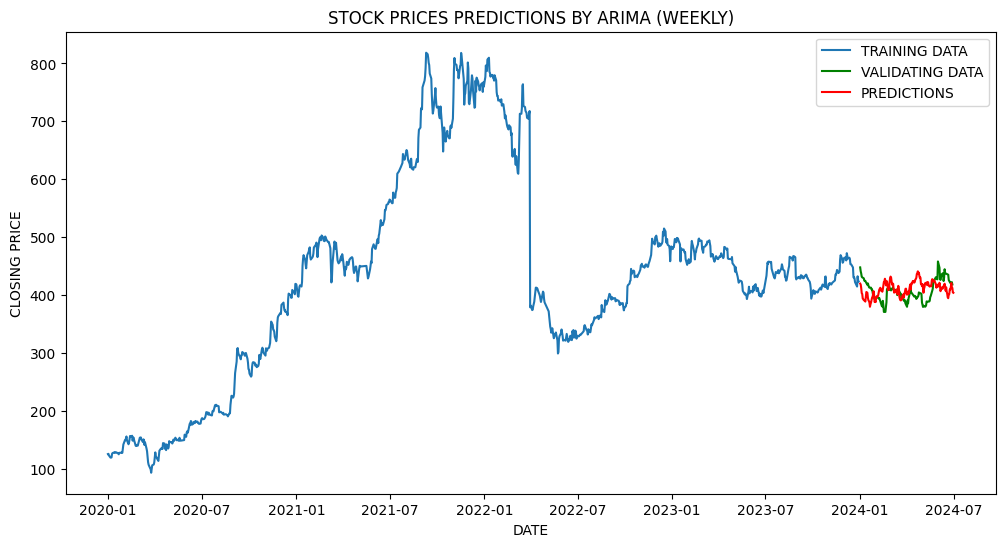

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(training_data["CLOSE"], label="TRAINING DATA")
plt.plot(validating_data["CLOSE"][:steps], label="VALIDATING DATA", color="green")
plt.plot(predictions, label="PREDICTIONS", color="red")
plt.title("STOCK PRICES PREDICTIONS BY ARIMA (WEEKLY)")
plt.xlabel("DATE")
plt.ylabel("CLOSING PRICE")
plt.legend()
plt.show()

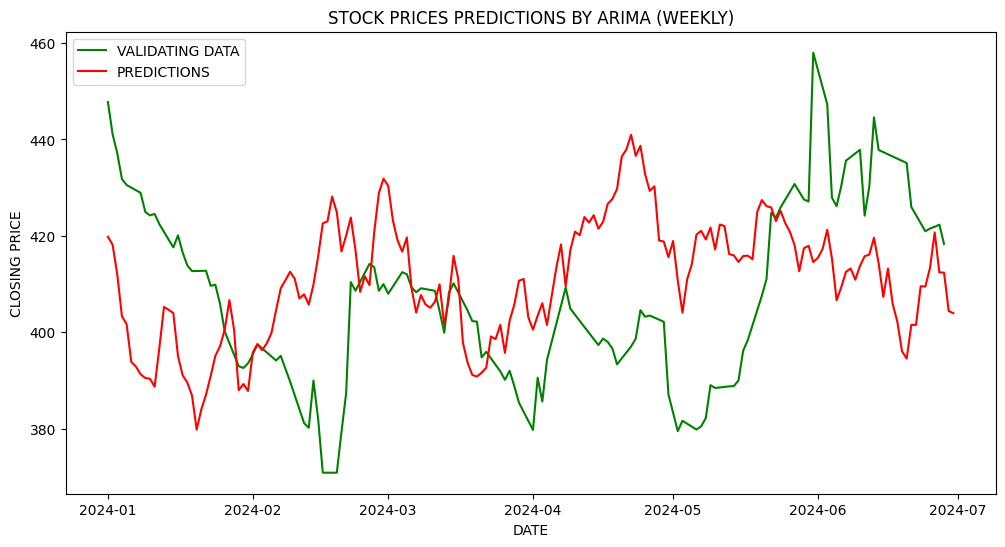

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(validating_data["CLOSE"][:steps], label="VALIDATING DATA", color="green")
plt.plot(predictions, label="PREDICTIONS", color="red")
plt.title("STOCK PRICES PREDICTIONS BY ARIMA (WEEKLY)")
plt.xlabel("DATE")
plt.ylabel("CLOSING PRICE")
plt.legend()
plt.show()